# 그래프 확률모형
- 확률 변수들 간의 joint probability를 알면 prediction 가능
$$
P(A, B, C, \cdots)
$$

# 1. 베이지안 네트워크 모형
- 그래프 확률 모형graphical probability model): 다수의 확률변수 중 특정 소수의 확률변수들이 가지는 관계를 그래프로 표현
- 방향성 그래프 Directed Acyclic Graph의 예

$$
\text{cause:A & result:B} \rightarrow P(B|A)
$$

- 전체 joint probability
$$
P(A, B, C) = P(A)P(B|A)P(C|B)
$$

- prediction에 필요한 모수
    - 기존 A, B, C 모두의 상관관계 고려: $3^3 -1=26$
    - 그래프 모형
        - $P(A): 3-1 =2$
        - $P(B|A): (3-1) \times 3 = 6$
        - $P(C|B): (3-1) \times 3 = 6$
        - Total: 14

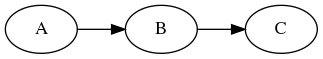

In [8]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g = nx.DiGraph()
g.add_path(["A", "B", "C"])

d = to_pydot(g)
d.set_rankdir("LR")
Image(d.create_png())

# 2. 베이지안 네트워크 결합확률분포
- 영향 관계는 부모까지만 고려(조부모X)
$$
P(X_1, \dots ,X_2) = \prod_{i=1}^N P(X_i | P_{parent}(X_i))
$$

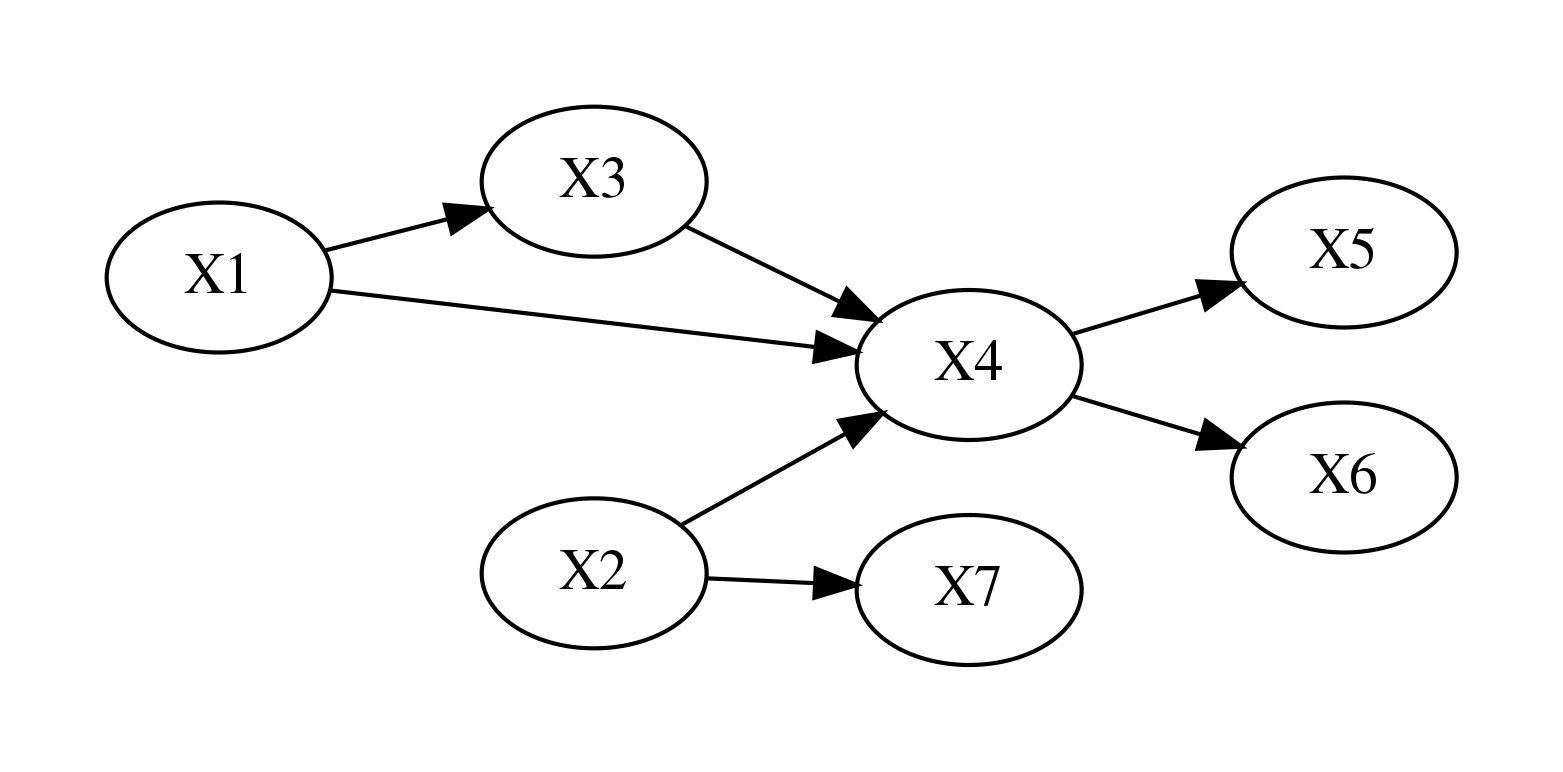

In [20]:
g1 = nx.DiGraph()
g1.add_edge("X1", "X3")
g1.add_edge("X1", "X4")
g1.add_edge("X3", "X4")
g1.add_edge("X2", "X4")
g1.add_edge("X2", "X7")
g1.add_edge("X4", "X5")
g1.add_edge("X4", "X6")

d1 = to_pydot(g1)
d1.set_dpi(300)
d1.set_margin(0.3)
d1.set_rankdir("LR")
Image(d1.create_png(), width=800)


- 예시
$$
P(X_1, \cdots, X_7) = \\P(X_1)P(X_2)P(X_3|X_1)P(X_4|X_1, X_2, X_3)P(X_5|X_4)P(X_6|X_4)P(X_7|X_2)
$$

## 2.1 조건부 독립
- **조건부 독립**: 일정 조건하에 독립
- 베이지안 네트워크에서는 확률변수간 조건부 독립 관계가 그래프에 나타나야 함
- 조건부 독립 VS 무조건부 독립: **관계없음**
$$
P(A,B|C) = P(A|C)P(B|C)
$$



## 2.2 방향성 분리
- "C가 A, B를 막고 있다(block)"
$$
P(A, B|C) = P(A|C)P(B|C)
$$
- tail to tail: 조건부 독립 O
- head to tail: 조건부 독립 O
- head to head(**V 구조**): 무조건부 독립(조건부 독립X)

## 2.3 방향성 분리 정리
1. C: A, B 경로에 있는 꼬리-C-꼬리 결합 or 머리-C-꼬리 결합
2. ~C: 머리-C-머리(X), 그 자손도 안됨

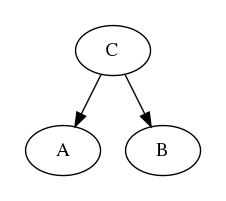

In [38]:
# 아빠 키 안 정해지면, 같은 집안이니까 비슷할 확률 높음
## 형이 크면 동생도 클 확률 높음
# 아빠 키가 작다고 정해지면, 첫째, 둘째 키는 독립
## 형이 크다고 동생이 크지는 않음
g2 = nx.DiGraph()
g2.add_path(["C", "A"])
g2.add_path(["C", "B"])
d2 = to_pydot(g2)
d2.set_dpi(100)
d2.set_margin(0.2)

Image(d2.create_png(), width=100)

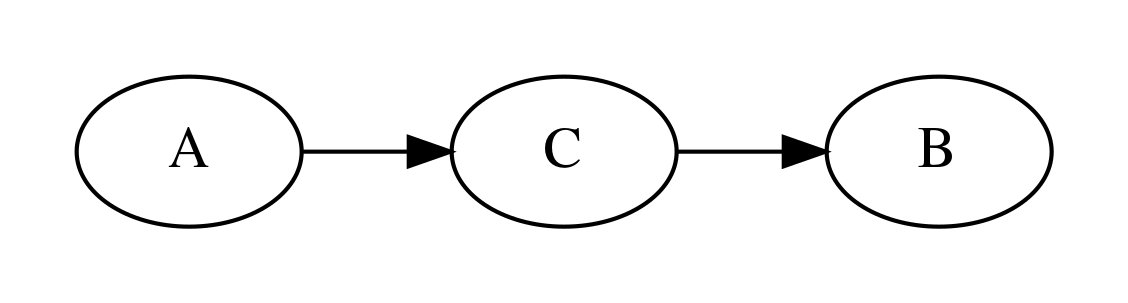

In [35]:
# 건강 - 공부시간 - 성적
# 건강이 아무리 안좋아도, 일단 공부시간이 6시간으로 정해졌으면, 성적은 건강과 무관
g2 = nx.DiGraph()
g2.add_path(["A", "C", "B"])
d2 = to_pydot(g2)
d2.set_dpi(300)
d2.set_rankdir("LR")
d2.set_margin(0.2)
Image(d2.create_png(), width=200)

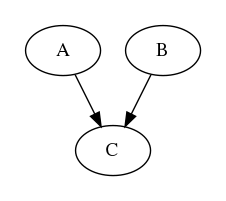

In [37]:
# 무조건부 독립(조건부 독립X)
# A 지진/B 폭설은 원래 무조건부 독립
## 그러나 C 길막 발생하면 -> 지진 아니면, 폭설 확률이 높아짐
### 종속관계(더이상독립 X)
g2 = nx.DiGraph()
g2.add_path(["A", "C"])
g2.add_path(["B", "C"])
d2 = to_pydot(g2)
d2.set_dpi(100)
d2.set_margin(0.2)
Image(d2.create_png(), width=100)

---

연습
- 베이지안 네트워크 
- `code`
    - `from pgmpy.factors.discrete import TabularCPD`
    - `TabularCPD`: 조건부 확률 구현
    - `BayesianModel`: 노드 베이지안 네트워크화
    - `.add_cpds`: 확률 정보 추가
    - `VariableElimination`: 추론 방법 중 하나

In [2]:
from pgmpy.factors.discrete import TabularCPD
x1 = TabularCPD('X1', 2, [[.8, .2]])
x2 = TabularCPD('X2', 2, [[.9, .2],
                          [.1, .8]],
               evidence=['X1'], evidence_card=[2])
x3 = TabularCPD('X3', 2, [[.6, .4]])
x4 = TabularCPD('X4', 2, [[.9, .5, .3, .1],
                         [.1, .5, .7, .9]],
               evidence=['X2', 'X3'], evidence_card=[2, 2])

- X1: 눈
- X2: 길막
- X3: 늦잠
- X4: 지각

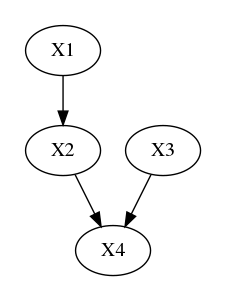

In [3]:
from pgmpy.models import BayesianModel
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

mod = BayesianModel([('X1', 'X2'), ('X2', 'X4'), ('X3', 'X4')])
mod.add_cpds(x1, x2, x3, x4)

d = to_pydot(mod)
d.set_dpi(100)
d.set_margin(0.2)
Image(d.create_png(), width=100)

In [7]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(mod)

In [11]:
# 지각확률
posterior = infer.query(['X4'])
print(posterior['X4'])

╒══════╤═══════════╕
│ X4   │   phi(X4) │
╞══════╪═══════════╡
│ X4_0 │    0.6152 │
├──────┼───────────┤
│ X4_1 │    0.3848 │
╘══════╧═══════════╛


In [12]:
posterior = infer.query(['X4'], evidence={'X3':1})
print(posterior['X4'])

╒══════╤═══════════╕
│ X4   │   phi(X4) │
╞══════╪═══════════╡
│ X4_0 │    0.4040 │
├──────┼───────────┤
│ X4_1 │    0.5960 │
╘══════╧═══════════╛


In [14]:
posterior = infer.query(['X4'], evidence={'X1':1})
print(posterior['X4'])

╒══════╤═══════════╕
│ X4   │   phi(X4) │
╞══════╪═══════════╡
│ X4_0 │    0.3240 │
├──────┼───────────┤
│ X4_1 │    0.6760 │
╘══════╧═══════════╛
